# $D_{p,i} = 0.6 nm$

In [1]:
import TiO2
import plot

In [2]:
#"0.6nm","0.8nm","1nm","1.2nm","1.4nm","1.6nm","1.8nm","2nm","2.2nm","2.4nm","2.6nm","2.8nm","3nm"
## --------------   From MD simulation   -------------- ##
MDdata=TiO2.TiO2()
MDdata.sizeSet(3)       # 1:1nm, 2:2nm, 3:0.6nm, 4:3nm
MDdata.tempSet(1000)
MDdata.mapping()

plot=plot.plot()

MDdata.critical()

## --------------   Analysis   -------------- ##


## Plobability

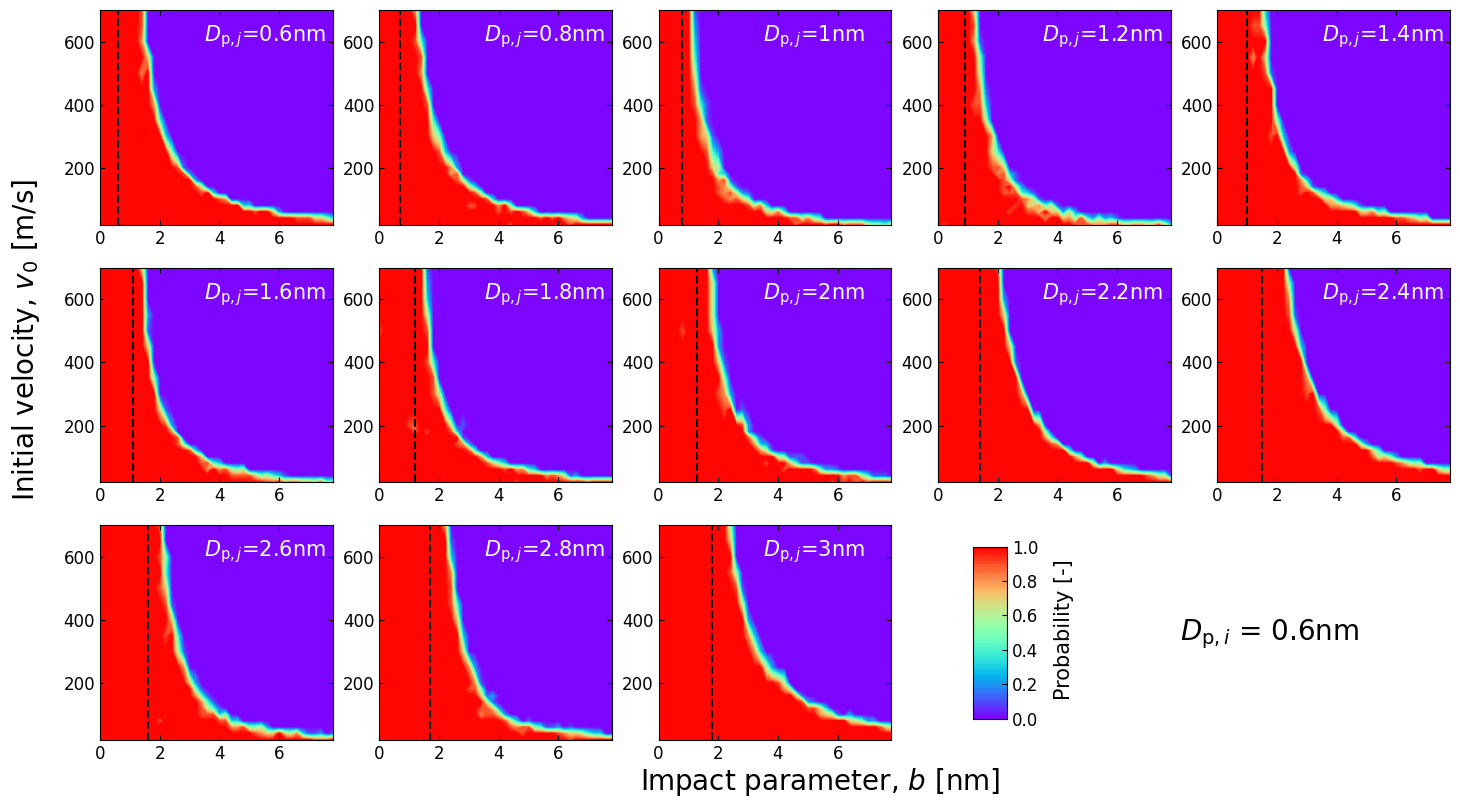

In [3]:
plot.probabilityMap(MDdata)

## Calculation zone

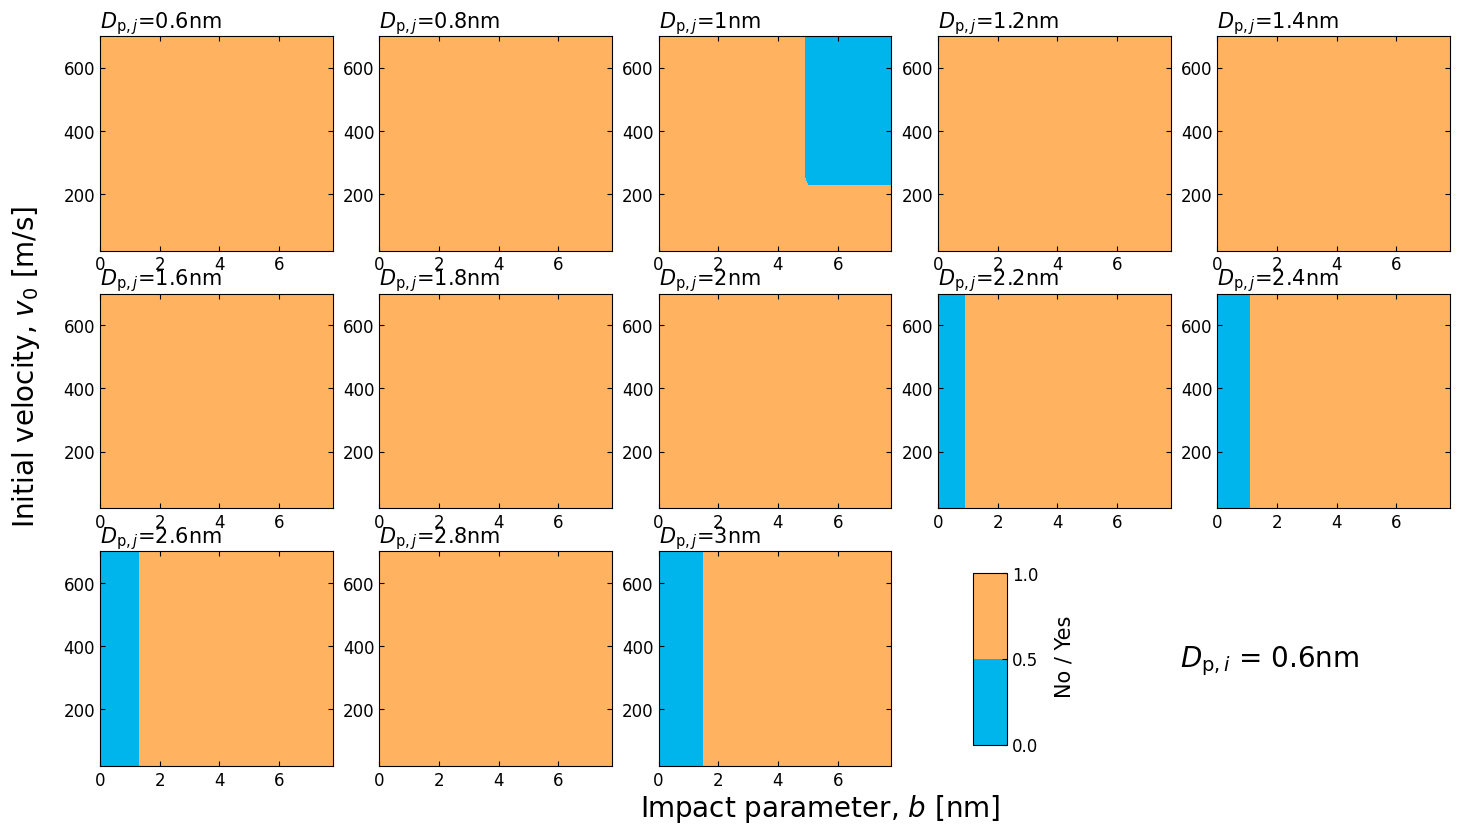

In [4]:
plot.flagMap(MDdata)

## Binding length

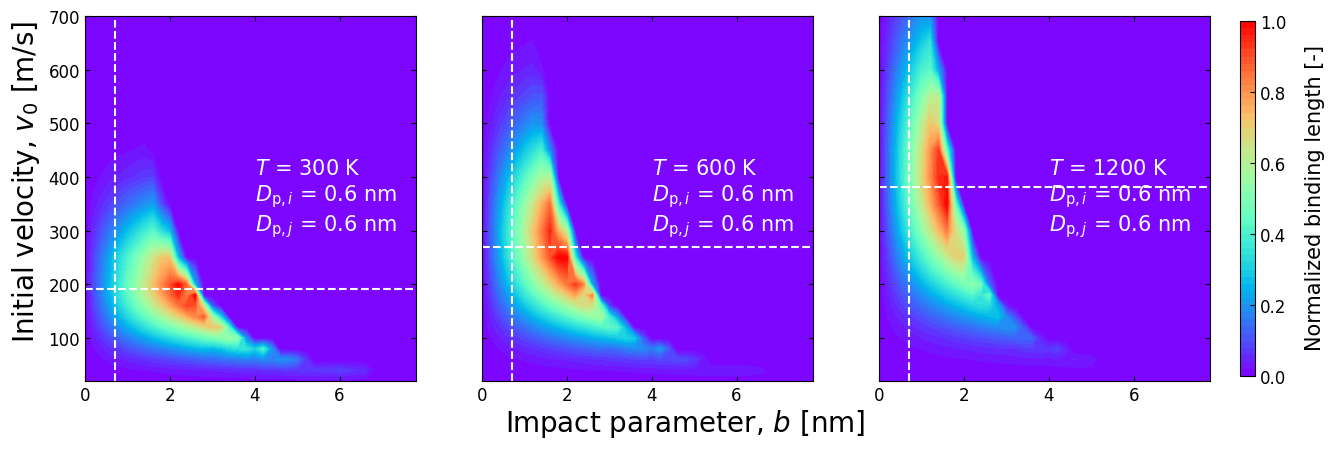

In [5]:
import numpy as np
import matplotlib.pylab as plt
def pltNormal():
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.rcParams["font.size"]=12

def axNormal(ax):
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
n2=1
fig, axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
for i in np.arange(3):
    axNormal(axs.flat[i])
plt.rcParams["font.size"]=12
fig.text(0.55,0.05,r"Impact parameter, $b$ [nm]",ha="center",size=20)
fig.text(0.10,0.55,"Initial velocity, $v_0$ [m/s]",va="center",rotation="vertical",size=20)
figRes=50
b,v=np.meshgrid(MDdata.bs*0.1,MDdata.vs)
tempArray=np.array([300,600,1200])
Tsize=np.size(tempArray)
plt.ylim(20,700)

for i in np.arange(Tsize):
    MDdata.tempSet(tempArray[i])
    MDdata.BLmapping(n2)
    cbar=MDdata.meanThermalSpeed(n2)+b[0]*0
    axs.flat[i].text(4,300,r"$T$ = "+str(int(MDdata.T))+" K\n"+"$D_{{\\rm p},i}$ = 0.6 nm" +"\n"+ "$D_{{\\rm p},j}$ = 0.6 nm",size=15,color="white")
    axs.flat[i].contourf(b,v,MDdata.blArray[n2]/np.max(MDdata.blArray[n2]),figRes,cmap="rainbow")
    axs.flat[i].plot(b[0],cbar, ls='--', color = 'white')
    axs.flat[i].axvline(x = (MDdata.dpSize[MDdata.n1]+MDdata.dpSize[n2])*0.5, ls='--', color = 'white')

im=axs.flat[2].contourf(b,v,MDdata.blArray[n2]/np.max(MDdata.blArray[n2]),figRes,cmap="rainbow")
#axs.flat[0].text(5,250,r"$\sqrt{\frac{8 k_b T}{\pi m_{ij}}}$",size=18,color="white")
#axs.flat[0].text(1.1,600,r"${\frac{D_{{\rm p,}i}+D_{{\rm p,}j}}{2}}$",size=18,color="white")
fig.text(0.97,0.22,"Normalized binding length [-]",ha="center",rotation="vertical",size=15)
cbar_ax = fig.add_axes([0.92, 0.16, 0.01, 0.71])
fig.colorbar(im, cax=cbar_ax,ticks=np.array([0,0.2,0.4,0.6,0.8,1]))
plt.savefig(MDdata.dpString[MDdata.n1]+"BLtemp.png", dpi=1000)
plt.show()

## $\beta$ and $\eta$ vs. temperature

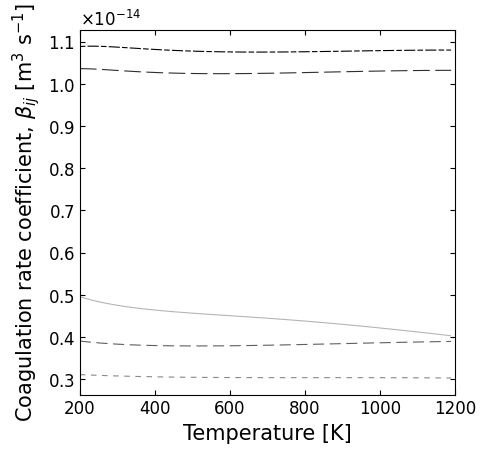

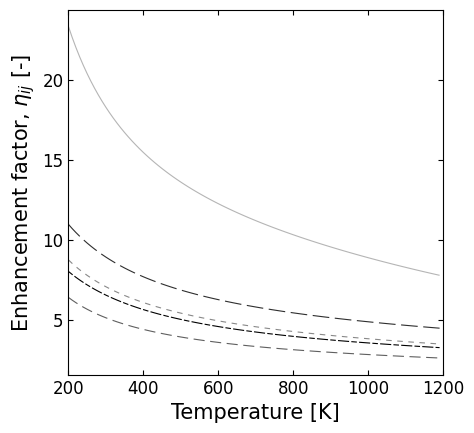

In [6]:
plot.betaTemp(MDdata,200,1200)
plot.enhanceTemp(MDdata,200,1200)